# **Towards a Resilient Grid: Strategies for Variable Renewable Energy in Kenya**
##### *Data-Driven Solutions for a Reliable and Green Energy Future.*

Group Members:
1. Naomi Ngigi
2. Elvis Kiprono
4. Janine Makorre
5. Trevor Maina
6. Caroline Wachira

DSF 12 FT Remote 

July - August 2025

## Introduction

Kenya is on an ambitious path to achieve universal access to affordable, reliable, and modern energy while transitioning to a low-carbon economy. As outlined in the Kenya National Energy Policy (2025 draft), the National Energy Efficiency and Conservation Strategy (2020), and the 100% Renewable Energy Plan by 2050, the country is investing heavily in clean energy technologies such as geothermal, wind, and solar. Today, more than 80% of Kenya’s electricity already comes from renewable sources—making it one of the global leaders in sustainable power generation.

However, this transition faces challenges, including balancing variable renewable energy sources, ensuring grid stability, and meeting the growing energy demand driven by industrialization and population growth. Forecasting energy demand and optimizing renewable integration are critical to preventing outages, reducing reliance on thermal energy, and supporting sustainable economic development.

Our capstone project, “Towards a Resilient Grid: Strategies for Variable Renewable Energy in Kenya,” builds on this vision by developing real-time energy demand forecasting and grid optimization tools. By leveraging historical energy generation and consumption data, our solution will help Kenya maximize renewable energy utilization, enhance energy reliability, and guide infrastructure investments.

## Problem Statement 

Kenya’s power grid is expanding rapidly, yet it continues to face persistent challenges in balancing rising electricity demand with the variable output of renewable energy sources such as solar, wind, and hydro. Despite the country’s abundant clean energy potential, transmission and distribution networks remain constrained, resulting in frequent outages, underutilization of renewable capacity, and increased dependence on costly thermal power during peak demand periods.

This imbalance drives up system costs, reduces reliability, and undermines efforts to achieve affordable, sustainable, and inclusive electricity access. As energy demand accelerates and climate commitments intensify, there is an urgent need for accurate short- and medium-term demand forecasting, smarter renewable integration, and data-driven grid planning to prioritize upgrades where they will deliver the most impact.

Without these innovations, even high renewable penetration will not translate into a resilient, efficient, or equitable power system. The strategic deployment of intelligent forecasting and optimization tools can unlock Kenya’s clean energy potential—ensuring stability, affordability, and scalability for both urban and rural communities.

## Objectives

1. How can we accurately forecast electricity demand?
2. How to optimize the share of variable renewables in the grid?
3. Which infrastructure investments reduce grid bottlenecks?


## Key Stakeholders

+ Kenya Power: Cuts outages and costly backups.                                                    
+ Energy & Petroleum Regulatory Authority (EPRA): Enables smarter, data-driven regulation
+ Ministry of Energy: Guides strategic energy investments.
+ Renewable developers (solar farms, wind IPPs): Reduces curtailment, boosts project value.
+ Industrial & commercial users: Ensures reliable, predictable power.
+ Policy makers, donors, investors: Directs funding where impact is highest.

## Description of dataset

All data used in this analysis is sourced from the Energy and Petroleum Regulatory Authority (EPRA), Kenya’s independent energy regulator. EPRA collects, verifies, and publishes official statistics on electricity generation, sales, customer connections, and grid infrastructure. These datasets provide a reliable foundation for demand forecasting, renewable integration, and grid optimization—supporting Kenya’s clean energy transition.

### Dataset Summary (2019 – April 2025)

We utilize five core EPRA datasets that provide a multi-dimensional view of Kenya’s power system:

### 1. Electricity Generation by Technology
- **Time Range:** Jan 2019 – Apr 2025 (Monthly)  
- **Features:** Energy generation (GWh) by source – Hydro, Thermal, Wind, Geothermal, Bagasse/Biogas, Imports, Solar, Total.

### 2. Installed Renewable Capacity
- **Reference Year:** 2024  
- **Features:** Installed capacity (MW) by technology – Hydro, Geothermal, Wind, Biomass, Solar.

### 3. Transmission & Distribution Infrastructure
- **Time Range:** FY 2019/20 – Apr 2025  
- **Features:** Circuit length (km) by voltage – HV (500kV to 66kV), MV (33kV, 11kV), LV (415/240V).

### 4. Grid Connectivity
- **Time Range:** Jul 2019 – Apr 2025 (Monthly)  
- **Features:** New customer connections and cumulative totals.

### 5. Electricity Consumption
- **Time Range:** Jul 2019 – Apr 2025 (Monthly)  
- **Features:** Electricity sales to end-users (GWh).

## Project Approach

1. **Data Collection & Validation**  
   - Load and inspect EPRA datasets (2019–Apr 2025) on generation, consumption, capacity, grid infrastructure, and connectivity.  
   - Clean, standardize units (GWh/MW), handle missing values, and validate data integrity.

2. **Exploratory Data Analysis (EDA)**  
   - Visualize trends in demand vs. generation (line charts, stacked area plots).  
   - Analyze seasonal peaks and renewable contributions over time.  
   - Correlate connectivity and infrastructure expansion with consumption patterns.

3. **Feature Engineering**  
   - Create time-based features (month, quarter, year).  
   - Generate derived metrics: renewable share %, demand-growth rates, grid expansion indicators.

4. **Modeling & Forecasting**  
   - Apply time series models (ARIMA, Prophet, LSTM) for short- and medium-term demand forecasting.  
   - Evaluate models using MAE, RMSE, and MAPE.  
   - Use regression for outage risk scoring or grid stress indicators.

5. **Visualization & Insights**  
   - Build interactive dashboards (Tableau/Power BI) to visualize demand trends, forecasts, and renewable utilization scenarios.

6. **Deployment (MVP)**  
   - Package models into a FastAPI endpoint for real-time forecasting.  
   - Enable energy planners and developers to query future demand and optimize renewable integration.

# DATA UNDERSTANDING

## Libraries and Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


## Loading Datasets

In [2]:
df_consumption = pd.read_excel('epra_data/Electricity_Consumption.xlsx', skiprows=1).set_index('Month').T
df_consumption

Month,Sales GWh
2019-07-01,748.236679
2019-08-01,749.914883
2019-09-01,740.489519
2019-10-01,754.343940
2019-11-01,763.255304
...,...
2024-12-01,886.000000
2025-01-01,957.000000
2025-02-01,916.000000
2025-03-01,943.000000


In [3]:
df_grid_connectivity = pd.read_excel('epra_data/Grid_Connectivity.xlsx', skiprows=1)
df_grid_connectivity.head()

,Period,Number of new customers,Cummulative Connections
0,2019-07-01,51685,7140389
1,2019-08-01,44145,7183311
2,2019-09-01,38045,7205121
3,2019-10-01,48889,7263265
4,2019-11-01,39715,7297028


In [4]:
df_av_price = pd.read_excel('epra_data/Average_Retail_Prices.xlsx').set_index('Average retail tariff (KShs/kWh)').T
df_av_price.head()

Average retail tariff (KShs/kWh),DC 1 Lifeline (0-30 kWh),DC 2 Ordinary (30-100 kWh),DC 3 Ordinary (100-15000 kWh),Small Commercial 1 (0-30 kWh),Small Commercial 2 (30kWh-100kWh),Small Commercial 3 (100kWh-1500kWh),SC3 Bulk Supply (1000kWh-1500kWh),"Commercial Industrial 1 - 415 V (> 15,000 kWh)","Commercial Industrial 2 - 11,000 V","Commercial Industrial 3 - 33,000 V","Commercial Industrial 4 - 66,000 V","Commercial Industrial 5 - 132,000 V","Commercial Industrial 6 - 220,000 V",Commercial Industrial 7 (SEZs),E-Mobility,Street Lighting
2011-01-01 00:00:00,21.1076,10.3556,13.69235,17.1548,15.9452,NaN,NaN,13.896878,11.3629,11.453198,10.859353,10.364754,NaN,NaN,NaN,14.351489
2011-02-01 00:00:00,21.9364,11.1844,14.52115,17.9836,16.7740,NaN,NaN,14.725678,12.1917,12.281998,11.688153,11.193554,NaN,NaN,NaN,15.180289
2011-03-01 00:00:00,23.0452,12.2932,15.62995,19.0924,17.8828,NaN,NaN,15.834478,13.3005,13.390798,12.796953,12.302354,NaN,NaN,NaN,16.289089
2011-04-01 00:00:00,24.2100,13.4580,16.79475,20.2572,19.0476,NaN,NaN,16.999278,14.4653,14.555598,13.961753,13.467154,NaN,NaN,NaN,17.453889
2011-05-01 00:00:00,24.7812,14.0292,17.36595,20.8284,19.6188,NaN,NaN,17.570478,15.0365,15.126798,14.532953,14.038354,NaN,NaN,NaN,18.025089


In [5]:
df_electricity_generation_by_technology = pd.read_excel('epra_data/Electricity_Generation_By_Technology.xlsx').set_index('Energy Purchased (GWh)').T
df_electricity_generation_by_technology

Energy Purchased (GWh),HYDRO,Thermal,WIND,GEOTHERMAL,BAGASSE/BIOGAS,IMPORTS,SOLAR,Total
2019-01-01,278.925391,114.068527,147.551950,417.351390,0.021523,15.176310,7.995863,981.090954
2019-02-01,253.903281,98.556148,146.213428,374.429163,0.013541,14.277945,7.025732,894.419237
2019-03-01,282.826276,98.999828,143.998739,445.103910,0.017971,17.137795,8.073783,996.158301
2019-04-01,191.990307,181.133055,142.211181,397.662472,0.010936,27.224380,8.196664,948.428995
2019-05-01,242.622647,110.332924,164.119003,427.383580,0.003829,24.533480,7.916970,976.912433
...,...,...,...,...,...,...,...,...
2024-12-01,286.308316,103.444933,148.026413,476.336640,0.000000,128.142403,44.878796,1187.137500
2025-01-01,282.660656,108.388546,159.353989,483.293050,0.000000,146.021055,37.375105,1217.092402
2025-02-01,240.079841,113.335233,194.406291,415.083120,0.000000,124.121381,44.424766,1131.450632
2025-03-01,274.267188,154.208331,168.144407,475.698910,0.000000,120.763716,43.968898,1237.051450


In [6]:
df_Installed_Capacity_Renewables = pd.read_excel('epra_data/Installed_Capacity_Renewables.xlsx')
df_Installed_Capacity_Renewables

,Technology,Installed Capacity(MW)
0,Hydro,839.48
1,Geothermal,939.98
2,Wind,435.50
3,Biomass,2.00
4,Solar,210.25
5,Total,2427.21


In [7]:
df_Transmission_and_Distribution_Infrastructure = pd.read_excel('epra_data/Transmission_and_Distribution_Infrastructure.xlsx')
df_Transmission_and_Distribution_Infrastructure

,"TRANSMISSION AND DISTRIBUTION LINES, CIRCUIT LENGTH IN KILOMETRES",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,VOLTAGE,2019/20,2020/21,2021/22,2022/23,2023/24,2024/25 upto April 2025
1,500kV HVDC Ketraco,NaN,NaN,NaN,1254,1254,1254
2,400 kV Ketraco,1980.98,1980.98,2030.98,2030.98,2031,2031
3,220kv Ketraco & KenGen links,454,454,724,724,792,792
4,132kv Ketraco,1022.034,1094.034,1094.034,1264.285,1358.285,1452
5,Kplc,NaN,NaN,NaN,NaN,NaN,NaN
6,220 kV,1352.3,1352.3,1352.3,1352.3,1352,1352
7,132 kV,2349.916,2349.916,2349.916,2349.916,2350,2350
8,66 kV,1187.18,1187.18,1188.18,1226.8554,1313,1423
9,33 kV,35703.1119,36569.727,38051,39167.6037,39940,40836


## Merging all time-series DataFrames on their 'Month' index

### 1. Converted the index to datetime objects

In [8]:
#----- 1. Consumption Dataset-----
# Renamed the column for clarity
df_consumption.index.name = 'Month'
df_consumption.columns.name = None
df_consumption.index = pd.to_datetime(df_consumption.index)
df_consumption = df_consumption.rename(columns={'Sales GWh': 'electricity_consumption_GWh'})
print(df_consumption)

#----- 2. Electricity Generation By Technology Dataset-----
# Renamed columns for clarity (removed spaces and special characters)
df_electricity_generation_by_technology.index.name = 'Month' # Rename the index to 'Month'
df_electricity_generation_by_technology.columns.name = None
df_electricity_generation_by_technology.index = pd.to_datetime(df_electricity_generation_by_technology.index)
df_electricity_generation_by_technology.columns = [col.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_').replace('/', '_') for col in df_electricity_generation_by_technology.columns]
df_generation = df_electricity_generation_by_technology
print(df_generation.head())

#----- 3. Average Retail Price-----
# Clean column names (removed parentheses, spaces, and replace with underscores)
df_av_price.index.name = 'Month'
df_av_price.columns.name = None 
df_av_price.index = pd.to_datetime(df_av_price.index)
df_av_price.columns = [col.replace(' ', '_').replace('(', '').replace(')', '').replace('-', '_').replace('.', '').replace('kWh', 'per_kWh') for col in df_av_price.columns]
df_prices = df_av_price
print(df_prices.head())

#----- 4. Grid Connectivity-----
# Clean column names
df_grid_connectivity['Period'] = pd.to_datetime(df_grid_connectivity['Period'])
df_grid_connectivity = df_grid_connectivity.set_index('Period')
df_grid_connectivity.index.name = 'Month'
df_grid_connectivity.columns = [col.replace(' ', '_') for col in df_grid_connectivity.columns]
df_connectivity = df_grid_connectivity
print(df_connectivity.head())

            electricity_consumption_GWh
Month                                  
2019-07-01                   748.236679
2019-08-01                   749.914883
2019-09-01                   740.489519
2019-10-01                   754.343940
2019-11-01                   763.255304
...                                 ...
2024-12-01                   886.000000
2025-01-01                   957.000000
2025-02-01                   916.000000
2025-03-01                   943.000000
2025-04-01                   943.000000

[70 rows x 1 columns]
                 HYDRO     Thermal        WIND  GEOTHERMAL  BAGASSE_BIOGAS  \
Month                                                                        
2019-01-01  278.925391  114.068527  147.551950  417.351390        0.021523   
2019-02-01  253.903281   98.556148  146.213428  374.429163        0.013541   
2019-03-01  282.826276   98.999828  143.998739  445.103910        0.017971   
2019-04-01  191.990307  181.133055  142.211181  397.662472        0

### 2. Transposed years into a single column

In [9]:
import pandas as pd

# Read and clean infrastructure Excel
df_infra_raw = pd.read_excel(
    'epra_data/Transmission_and_Distribution_Infrastructure.xlsx',
    skiprows=2,
    engine='openpyxl'
)

# Rename columns explicitly
df_infra_raw.columns = ['VOLTAGE', '2019/20', '2020/21', '2021/22', '2022/23', '2023/24', '2024/25 upto April 2025']
df_infra_raw.dropna(how='all', inplace=True)

# Set VOLTAGE as index and transpose
df_infrastructure = df_infra_raw.set_index('VOLTAGE').T
df_infrastructure.index.name = 'Fiscal_Year'
df_infrastructure

VOLTAGE,400 kV Ketraco,220kv Ketraco & KenGen links,132kv Ketraco,Kplc,220 kV,132 kV,66 kV,33 kV,11 kV,Total HV and MV,415/240V or 433/250V,TOTAL
Fiscal_Year,,,,,,,,,,,,
2019/20,1980.98,454.0,1022.034,NaN,1352.3,2349.916,1187.1800,35703.1119,40615.9474,84665.4693,158526.9060,243192.3753
2020/21,1980.98,454.0,1094.034,NaN,1352.3,2349.916,1187.1800,36569.7270,41553.0609,86541.1979,168595.1352,255136.3331
2021/22,2030.98,724.0,1094.034,NaN,1352.3,2349.916,1188.1800,38051.0000,42971.0000,89761.4100,200050.0000,289811.4100
2022/23,2030.98,724.0,1264.285,NaN,1352.3,2349.916,1226.8554,39167.6037,44077.0279,93446.9680,217784.4192,311231.3872
2023/24,2031.00,792.0,1358.285,NaN,1352.0,2350.000,1313.0000,39940.0000,44959.0000,95349.2850,225413.0000,320762.2850
2024/25 upto April 2025,2031.00,792.0,1452.000,NaN,1352.0,2350.000,1423.0000,40836.0000,45792.0000,97282.0000,232084.0000,329366.0000


This section focuses on transforming the annual df_infrastructure data into a monthly format. Since the original data is annual (e.g., '2019/20'), we convert these fiscal year labels into datetime objects (e.g., '2019-07-01' for the start of the fiscal year). Then, we reindex this annual data to a continuous monthly range and use a "forward-fill" (ffill()) method. Forward-filling assumes that the infrastructure capacity remains constant from the start of its fiscal year until the start of the next reported fiscal year.

In [10]:
df_infrastructure.index = pd.to_datetime(
    df_infrastructure.index.str.extract(r'(\d{4})')[0] + '-07-01'
)

# monthly range
monthly_index = pd.date_range(
    start=df_infrastructure.index.min(),
    end='2025-04-01',
    freq='MS'
)

# Reindex and forward fill
df_infrastructure = df_infrastructure.reindex(monthly_index, method='ffill')
df_infrastructure.index.name = 'Month'
df_infrastructure.reset_index(inplace=True)


In [11]:
def ensure_month_column(df):
    if 'Month' in df.index.names:
        if 'Month' in df.columns:
            df.index = df.index.droplevel('Month')
        else:
            df = df.reset_index()

    if 'Month' not in df.columns:
        raise ValueError("'Month' column not found after fixing index.")

    df['Month'] = pd.to_datetime(df['Month'])
    return df

In [12]:
df_consumption = ensure_month_column(df_consumption)
df_generation = ensure_month_column(df_generation)
df_prices = ensure_month_column(df_prices)
df_connectivity = ensure_month_column(df_connectivity)
df_infrastructure = ensure_month_column(df_infrastructure)


### 2. Merged Datasets

Now that df_consumption, df_generation, df_prices, df_connectivity, df_infrastructure are all consistently indexed by Month (datetime objects), we can merge them. 
For the time-series data, an outer merge is often a good starting point to ensure we don't lose any data points from different date ranges.

In [13]:
# Perform outer merges on 'Month'
merged_df = df_consumption.merge(df_generation, how='outer', on='Month')
merged_df = merged_df.merge(df_prices, how='outer', on='Month')
merged_df = merged_df.merge(df_connectivity, how='outer', on='Month')
merged_df = merged_df.merge(df_infrastructure, how='outer', on='Month')

# Sort and reset index
merged_df = merged_df.sort_values('Month').reset_index(drop=True)

# Preview
merged_df.head()

,Month,electricity_consumption_GWh,HYDRO,Thermal,WIND,GEOTHERMAL,BAGASSE_BIOGAS,IMPORTS,SOLAR,Total,...,132kv Ketraco,Kplc,220 kV,132 kV,66 kV,33 kV,11 kV,Total HV and MV,415/240V or 433/250V,TOTAL
0,2011-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2011-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-03-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-05-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Checking for nulls
This assumes that the last known value is the best estimate for subsequent missing periods. It's a robust starting point for time-series data.

In [14]:

missing_summary = merged_df.isnull().sum()
print(missing_summary[missing_summary > 0])

# Fill or interpolate if necessary
merged_df.fillna(method='ffill', inplace=True)
merged_df_cleaned = merged_df.ffill().bfill()

electricity_consumption_GWh                  103
HYDRO                                         97
Thermal                                       97
WIND                                          97
GEOTHERMAL                                    97
BAGASSE_BIOGAS                                99
IMPORTS                                       97
SOLAR                                         97
Total                                         97
Small_Commercial_3_100per_kWh_1500per_kWh    147
SC3_Bulk_Supply_1000per_kWh_1500per_kWh      147
Commercial_Industrial_6___220,000_V          147
Commercial_Industrial_7_SEZs                 147
E_Mobility                                   147
Number_of_new_customers                      103
Cummulative_Connections                      103
400 kV Ketraco                               103
220kv Ketraco & KenGen links                 103
132kv Ketraco                                103
Kplc                                         173
220 kV              

In [15]:
mask = (merged_df['Month'] >= '2019-07-01') & (merged_df['Month'] <= '2025-04-01')
merged_df = merged_df[mask].copy()
merged_df.head(2)

,Month,electricity_consumption_GWh,HYDRO,Thermal,WIND,GEOTHERMAL,BAGASSE_BIOGAS,IMPORTS,SOLAR,Total,...,132kv Ketraco,Kplc,220 kV,132 kV,66 kV,33 kV,11 kV,Total HV and MV,415/240V or 433/250V,TOTAL
102,2019-07-01,748.236679,268.911306,133.403590,124.891113,440.296882,0.015538,17.167435,7.093813,991.779677,...,1022.034,NaN,1352.3,2349.916,1187.18,35703.1119,40615.9474,84665.4693,158526.906,243192.3753
103,2019-08-01,749.914883,251.480174,131.764143,151.425390,425.461561,0.032577,24.050815,7.441962,991.656622,...,1022.034,NaN,1352.3,2349.916,1187.18,35703.1119,40615.9474,84665.4693,158526.906,243192.3753


In [16]:
# Export to CSV
merged_df.to_csv("merged_energy_dataset.csv", index=False)

In [17]:
df = pd.read_csv('merged_energy_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 40 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Month                                             70 non-null     object 
 1   electricity_consumption_GWh                       70 non-null     float64
 2   HYDRO                                             70 non-null     float64
 3   Thermal                                           70 non-null     float64
 4   WIND                                              70 non-null     float64
 5   GEOTHERMAL                                        70 non-null     float64
 6   BAGASSE_BIOGAS                                    70 non-null     float64
 7   IMPORTS                                           70 non-null     float64
 8   SOLAR                                             70 non-null     float64
 9   Total                  

### Data Cleaning and EDA

In [18]:
merged_df.describe()

,Month,electricity_consumption_GWh,HYDRO,Thermal,WIND,GEOTHERMAL,BAGASSE_BIOGAS,IMPORTS,SOLAR,Total,...,132kv Ketraco,Kplc,220 kV,132 kV,66 kV,33 kV,11 kV,Total HV and MV,415/240V or 433/250V,TOTAL
count,70,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,...,70.000000,0.0,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,2022-05-17 04:27:25.714285824,825.742637,285.827559,101.361441,152.475922,454.435520,0.024014,54.471232,25.751110,1074.343407,...,1207.315200,NaN,1352.205714,2349.942400,1249.410640,38307.675874,43257.606206,90999.885177,199503.907497,290503.792674
min,2019-07-01 00:00:00,646.588834,112.906133,35.677285,45.573260,304.772904,0.000000,9.001070,6.705212,849.922676,...,1022.034000,NaN,1352.000000,2349.916000,1187.180000,35703.111900,40615.947400,84665.469300,158526.906000,243192.375300
25%,2020-12-08 18:00:00,766.298692,252.866530,74.596692,130.521163,422.512895,0.003876,16.684049,7.798008,999.773109,...,1094.034000,NaN,1352.000000,2349.916000,1187.180000,36569.727000,41553.060900,86541.197900,168595.135200,255136.333100
50%,2022-05-16 12:00:00,831.723853,280.441318,99.675416,154.524983,461.918568,0.017995,27.574885,30.598433,1076.370179,...,1094.034000,NaN,1352.300000,2349.916000,1188.180000,38051.000000,42971.000000,89761.410000,200050.000000,289811.410000
75%,2023-10-24 06:00:00,879.465873,323.924071,119.406775,184.297165,493.778918,0.033576,103.177057,39.166743,1131.254600,...,1358.285000,NaN,1352.300000,2350.000000,1313.000000,39940.000000,44959.000000,95349.285000,225413.000000,320762.285000
max,2025-04-01 00:00:00,957.000000,400.307756,223.937819,237.492937,540.795257,0.118648,146.021055,46.686586,1237.051450,...,1452.000000,NaN,1352.300000,2350.000000,1423.000000,40836.000000,45792.000000,97282.000000,232084.000000,329366.000000
std,NaN,69.430454,56.207440,35.805399,38.535648,49.734749,0.026030,47.868599,14.818129,87.295750,...,153.749673,NaN,0.140275,0.039277,84.604344,1798.602321,1812.267300,4555.579529,28052.048763,32553.569592


In [19]:
merged_df.columns

Index(['Month', 'electricity_consumption_GWh', 'HYDRO', 'Thermal', 'WIND',
       'GEOTHERMAL', 'BAGASSE_BIOGAS', 'IMPORTS', 'SOLAR', 'Total',
       'DC_1_Lifeline_0_30_per_kWh', 'DC_2_Ordinary_30_100_per_kWh',
       'DC_3_Ordinary_100_15000_per_kWh', 'Small_Commercial_1_0_30_per_kWh',
       'Small_Commercial_2_30per_kWh_100per_kWh',
       'Small_Commercial_3_100per_kWh_1500per_kWh',
       'SC3_Bulk_Supply_1000per_kWh_1500per_kWh',
       'Commercial_Industrial_1___415_V_>_15,000_per_kWh',
       'Commercial_Industrial_2___11,000_V',
       'Commercial_Industrial_3___33,000_V',
       'Commercial_Industrial_4___66,000_V',
       'Commercial_Industrial_5___132,000_V',
       'Commercial_Industrial_6___220,000_V', 'Commercial_Industrial_7_SEZs',
       'E_Mobility', 'Street_Lighting', 'Number_of_new_customers',
       'Cummulative_Connections', '400 kV Ketraco',
       '220kv Ketraco & KenGen links', '132kv Ketraco', 'Kplc', '220 kV',
       '132 kV', '66 kV', '33 kV', '11 kV', 'Tot

In [20]:
merged_df.duplicated().sum()

0

In [21]:
print("Missing values in the dataset:\n")
merged_df.isnull().sum()

Missing values in the dataset:



Month                                                0
electricity_consumption_GWh                          0
HYDRO                                                0
Thermal                                              0
WIND                                                 0
GEOTHERMAL                                           0
BAGASSE_BIOGAS                                       0
IMPORTS                                              0
SOLAR                                                0
Total                                                0
DC_1_Lifeline_0_30_per_kWh                           0
DC_2_Ordinary_30_100_per_kWh                         0
DC_3_Ordinary_100_15000_per_kWh                      0
Small_Commercial_1_0_30_per_kWh                      0
Small_Commercial_2_30per_kWh_100per_kWh              0
Small_Commercial_3_100per_kWh_1500per_kWh           45
SC3_Bulk_Supply_1000per_kWh_1500per_kWh             45
Commercial_Industrial_1___415_V_>_15,000_per_kWh     0
Commercial

In [22]:
#NA Value calculation
null_val = merged_df.isna().sum()
null_val = null_val[null_val > 0]
print("\nSum of Missing values:\n", null_val)


Sum of Missing values:
 Small_Commercial_3_100per_kWh_1500per_kWh    45
SC3_Bulk_Supply_1000per_kWh_1500per_kWh      45
Commercial_Industrial_6___220,000_V          45
Commercial_Industrial_7_SEZs                 45
E_Mobility                                   45
Kplc                                         70
dtype: int64


In [23]:
#Unique Values Check
merged_df.nunique()

Month                                               70
electricity_consumption_GWh                         69
HYDRO                                               70
Thermal                                             70
WIND                                                70
GEOTHERMAL                                          70
BAGASSE_BIOGAS                                      63
IMPORTS                                             70
SOLAR                                               70
Total                                               70
DC_1_Lifeline_0_30_per_kWh                          63
DC_2_Ordinary_30_100_per_kWh                        63
DC_3_Ordinary_100_15000_per_kWh                     63
Small_Commercial_1_0_30_per_kWh                     63
Small_Commercial_2_30per_kWh_100per_kWh             63
Small_Commercial_3_100per_kWh_1500per_kWh           25
SC3_Bulk_Supply_1000per_kWh_1500per_kWh             25
Commercial_Industrial_1___415_V_>_15,000_per_kWh    63
Commercial

In [24]:
merged_df.dtypes

Month                                               datetime64[ns]
electricity_consumption_GWh                                float64
HYDRO                                                      float64
Thermal                                                    float64
WIND                                                       float64
GEOTHERMAL                                                 float64
BAGASSE_BIOGAS                                             float64
IMPORTS                                                    float64
SOLAR                                                      float64
Total                                                      float64
DC_1_Lifeline_0_30_per_kWh                                 float64
DC_2_Ordinary_30_100_per_kWh                               float64
DC_3_Ordinary_100_15000_per_kWh                            float64
Small_Commercial_1_0_30_per_kWh                            float64
Small_Commercial_2_30per_kWh_100per_kWh                    flo

# Business Analysis
The objectives of this analysis is to summarize, uncover relationships and patterns.

### 1. Visualization

### Relationship Between Consumption and Generation

Forecasting electricity demand is critical for energy providers, governments, and regulators to ensure reliable supply, avoid blackouts, and optimize infrastructure investments.

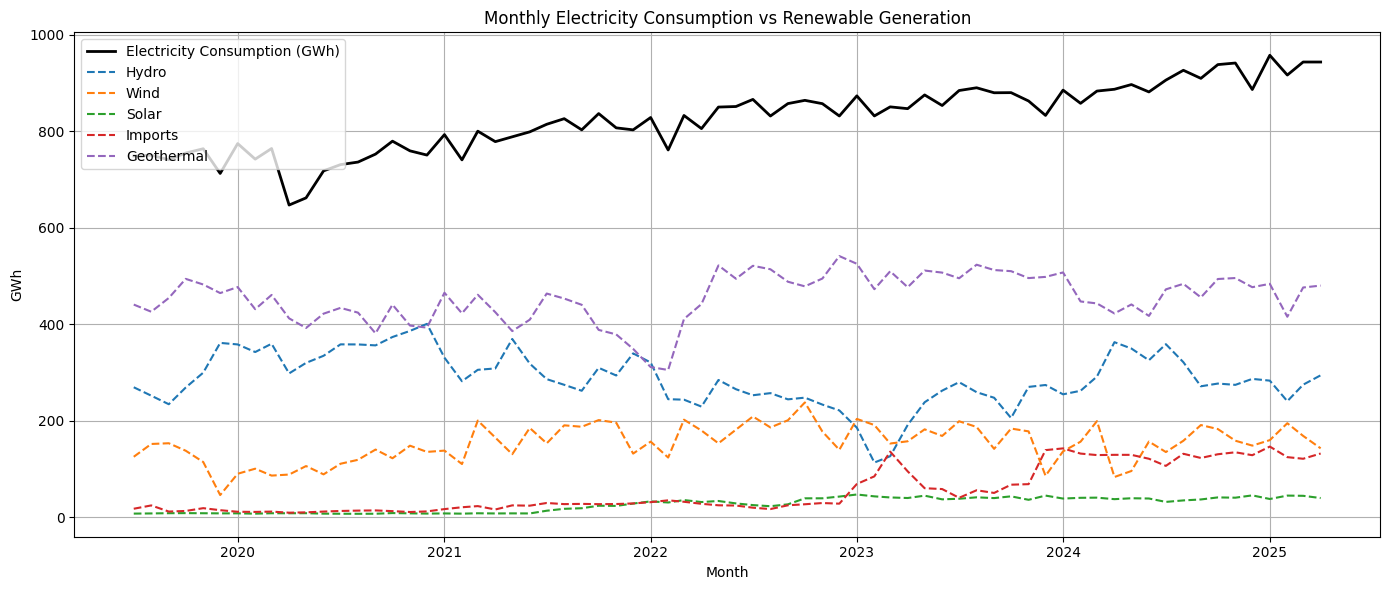

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

plt.plot(merged_df['Month'], merged_df['electricity_consumption_GWh'], label='Electricity Consumption (GWh)', color='black', linewidth=2)

plt.plot(merged_df['Month'], merged_df['HYDRO'], label='Hydro', linestyle='--')
plt.plot(merged_df['Month'], merged_df['WIND'], label='Wind', linestyle='--')
plt.plot(merged_df['Month'], merged_df['SOLAR'], label='Solar', linestyle='--')
plt.plot(merged_df['Month'], merged_df['IMPORTS'], label='Imports', linestyle='--')
plt.plot(merged_df['Month'], merged_df['GEOTHERMAL'], label='Geothermal', linestyle='--')

plt.title("Monthly Electricity Consumption vs Renewable Generation")
plt.xlabel("Month")
plt.ylabel("GWh")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


**Relationship Between Consumption and Generation**:

From the above linechart, consumption is consistently above all individual renewable generation lines, indicating that no single renewable source can meet the entire demand.

The gap between total consumption and the sum of displayed renewable generation implies that other sources (like Bagasse/Biogas, Imports, or Thermal) are used to meet demand, or that the "Total" generation line is implicitly meeting the consumption. The project explicitly states the ongoing reliance on costly thermal power during peak demand periods.

**Implications for Project Objectives**:

*Forecasting Electricity Demand*: The consistent upward trend in electricity consumption underscores the importance of accurate forecasting.

*Optimizing Renewable Share*: The variability of hydro and wind, combined with the significant contribution of geothermal, highlights the need to optimize the share of variable renewables to ensure grid stability and maximize renewable energy utilization. The relatively low contribution of solar suggests potential for growth in that sector.

### Total Electricity Generation Composition vs Demand

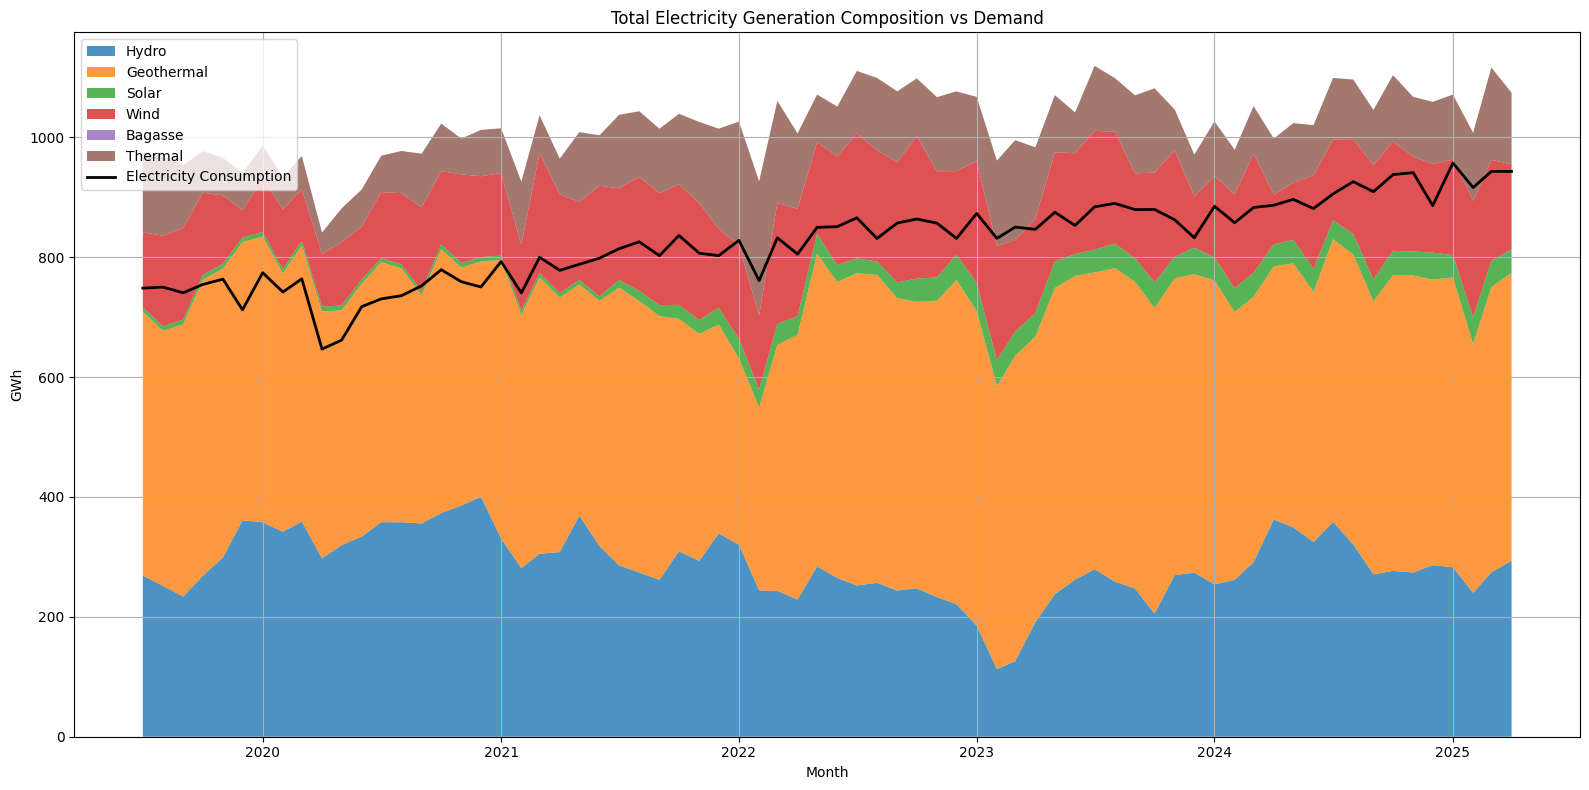

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 8))
plt.stackplot(
    merged_df['Month'],
    merged_df['HYDRO'],
    merged_df['GEOTHERMAL'],
    merged_df['SOLAR'],
    merged_df['WIND'],
    merged_df['BAGASSE_BIOGAS'],
    merged_df['Thermal'],
    labels=['Hydro', 'Geothermal', 'Solar', 'Wind', 'Bagasse', 'Thermal'],
    alpha=0.8
)

plt.plot(merged_df['Month'], merged_df['electricity_consumption_GWh'], label='Electricity Consumption', color='black', linewidth=2)

plt.title('Total Electricity Generation Composition vs Demand')
plt.xlabel('Month')
plt.ylabel('GWh')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


**Forecasting Electricity Demand**:
Electricity Consumption shows a clear upward trend, especially in recent years, with potential seasonal variations (e.g., higher demand during certain months). This trend visually underscores the growing energy needs in Kenya and highlights the importance of accurate demand forecasting to ensure supply meets future requirements.

**Optimizing the Share of Variable Renewables**:
We observed the dominant contributions of sources like Geothermal and Hydro. Geothermal shows a relatively stable or growing base load, while Hydro would likely exhibit significant seasonality, peaking during wet seasons and dropping during dry ones.

Wind and Solar contributions appear more variable, reflecting their intermittent nature.

The Thermal layer is crucial for this objective. Its presence and fluctuations indicates when and how much thermal power (often more expensive and less environmentally friendly) is used to fill gaps when renewable generation is insufficient or demand is high. The project's goal to optimize renewables is to minimize this reliance on thermal power.

By visualizing the mix, we identified periods where renewable curtailment might occur (if generation exceeds demand or grid capacity) or where thermal dispatch is heavily relied upon, guiding strategies for better renewable integration.

**Infrastructure Investments and Grid Bottlenecks**:
While the plot doesn't directly show infrastructure, the relationship between the total stacked generation and the consumption line is key. Ideally, total generation should closely track consumption to maintain grid stability.

If there are significant gaps between total generation and demand (meaning demand exceeds supply, leading to reliance on imports or outages), or if there's excess generation that can't be utilized, it points to potential grid bottlenecks in transmission, distribution, or storage.

The plot implicitly informs infrastructure needs: a growing demand line requires expanded capacity, and volatile renewable generation necessitates a smarter, more resilient grid to manage fluctuations.

### Renewable Energy Share by Month and Year

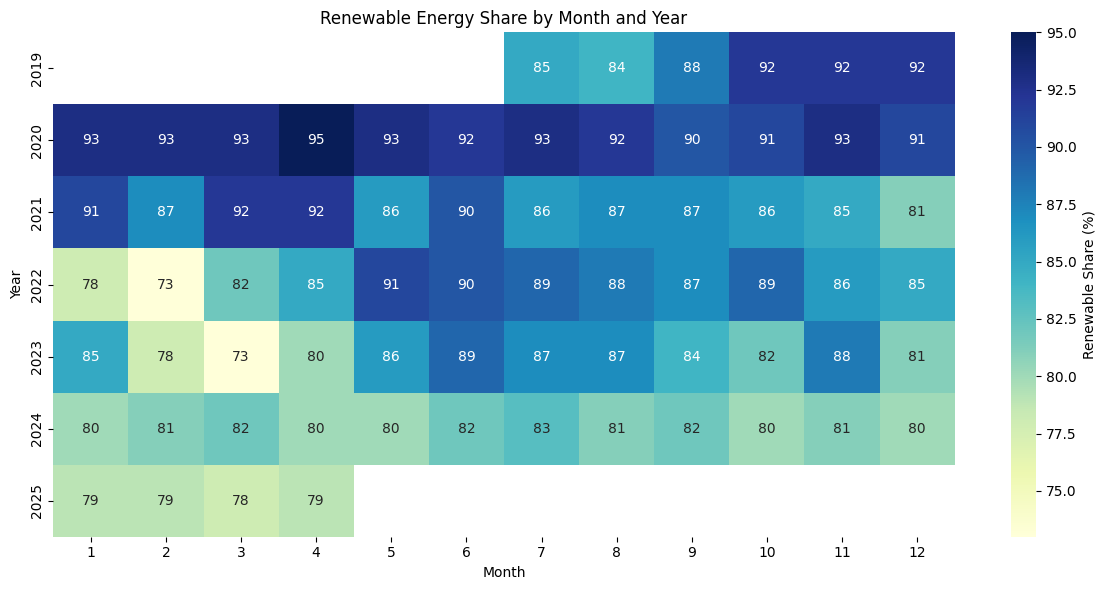

In [27]:
import seaborn as sns
import numpy as np
# Compute % share
merged_df.loc[:, 'Renewable_Generation'] = (
    merged_df['HYDRO'] +
    merged_df['GEOTHERMAL'] +
    merged_df['WIND'] +
    merged_df['SOLAR'] +
    merged_df['BAGASSE_BIOGAS']
)
heatmap_df = merged_df
heatmap_df['Year'] = heatmap_df['Month'].dt.year
heatmap_df['Month_num'] = heatmap_df['Month'].dt.month
heatmap_df['Renewable_Share_%'] = 100 * (
    merged_df['Renewable_Generation'] / merged_df['Total']
).round(2)

pivot = heatmap_df.pivot(index='Year', columns='Month_num', values='Renewable_Share_%')

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap='YlGnBu', cbar_kws={'label': 'Renewable Share (%)'})
plt.title('Renewable Energy Share by Month and Year')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


**Seasonal Patterns in Renewable Share:**

As we examine the heatmap vertically—month by month—we start to notice clear seasonal patterns in Kenya’s renewable energy contributions. For instance, we observe higher renewable shares during the rainy seasons, particularly around April–May and October–November. This aligns with the increased hydroelectric output during these wet months, as hydro is a major component of our renewable mix.

In contrast, the drier periods show a dip in renewable share, likely due to reduced hydro generation. Solar energy’s influence is also evident; during months with longer daylight hours and lower cloud cover, we see steady or even rising solar contributions. If wind patterns are seasonally strong in certain regions, we can detect those effects too.

**Year-over-Year Trends in Renewable Integration**

Looking horizontally across the years, we can assess whether Kenya is making sustained progress in renewable energy integration. When we see a gradual shift toward darker shades (more blue/green) over time, it tells us that our renewable share is growing year by year. This is a visual signal of success—our policies, investments, and infrastructure improvements are making a measurable impact.

**Spotting Periods of Thermal Dependency**

Lighter-colored cells immediately grab our attention—they flag the months where our grid relied more heavily on non-renewable thermal power. These are the stress points in our energy system. By identifying these bottlenecks, we know where to target optimization strategies such as:

- Demand response systems
- Grid-scale storage
- Increasing dispatchable renewables like geothermal

These insights guide our grid planning and operational decisions.

Assessing Reliability and Variability
Finally, this heatmap helps us evaluate the stability of our renewable contribution. Months or years with consistent high shares show that our system is becoming more reliable. Meanwhile, any sudden drops or erratic patterns alert us to underlying vulnerabilities—be it in infrastructure, resource availability, or policy execution.

### Demand vs Infrastructure Plot

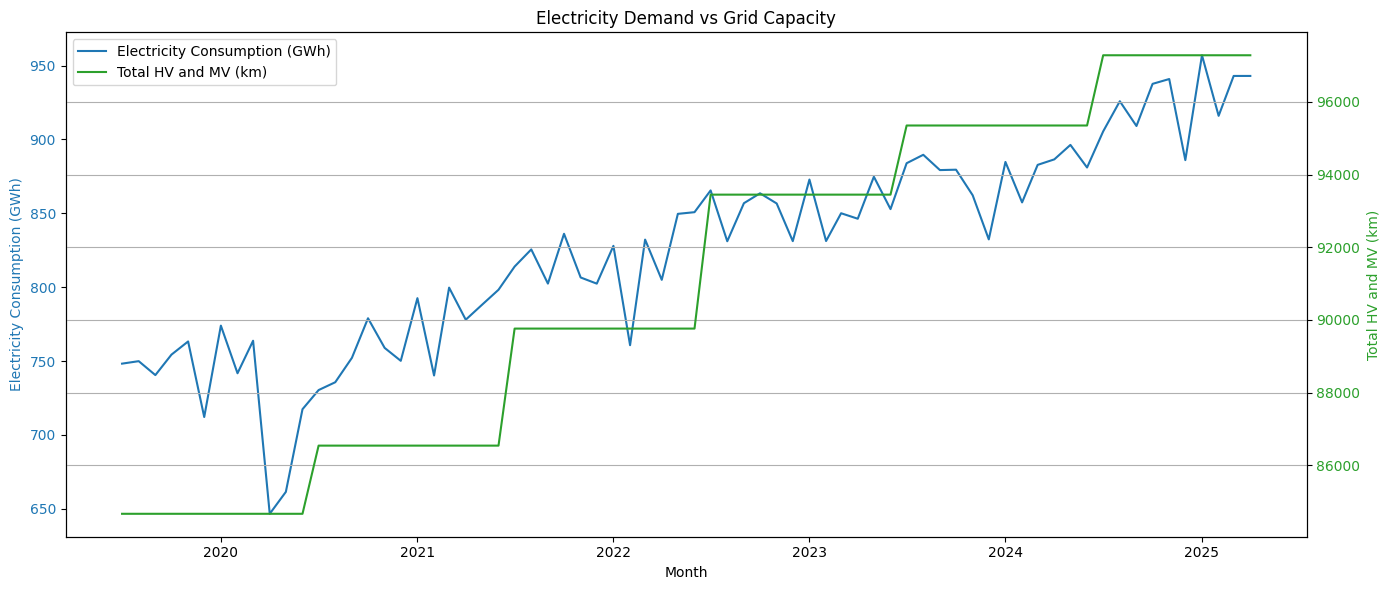

In [28]:
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot for ax1
color = 'tab:blue'
ax1.set_xlabel('Month')
ax1.set_ylabel('Electricity Consumption (GWh)', color=color)
line1, = ax1.plot(merged_df['Month'], merged_df['electricity_consumption_GWh'],
                  color=color, label='Electricity Consumption (GWh)')
ax1.tick_params(axis='y', labelcolor=color)

# Plot for ax2
ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Total HV and MV (km)', color=color)
line2, = ax2.plot(merged_df['Month'], merged_df['Total HV and MV'],
                  color=color, label='Total HV and MV (km)')
ax2.tick_params(axis='y', labelcolor=color)

# Combine legends
lines = [line1, line2]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

plt.title('Electricity Demand vs Grid Capacity')
fig.tight_layout()
plt.grid(True)
plt.show()

**Interpretation of the Demand vs Infrastructure Plot**

This chart plays a central role in addressing our project objectives—especially when it comes to understanding which infrastructure investments reduce grid bottlenecks and how we can better forecast electricity demand.

**Trends in Electricity Demand**

The blue line, representing electricity consumption (GWh), helps us visualize how our country's energy demand has evolved over time. We’re likely to observe an overall upward trend, driven by Kenya’s continued population growth, urbanization, and industrial expansion. Seasonal fluctuations may also become apparent, revealing patterns tied to climate or economic activity.

**Trends in Grid Capacity (Infrastructure)**

The green line, depicting Total HV and MV capacity (km), reflects our investments in grid expansion—especially in transmission and distribution. If this line shows steady growth, it signals that we are making strides to expand our electricity infrastructure and connect more households, industries, and businesses to the grid.

**How Demand and Infrastructure Interact**

This plot becomes especially powerful when we analyze the relationship between these two lines. Here's what we uncover:

Spotting Bottlenecks: When electricity demand rises faster than grid capacity, it exposes stress points in our system—places where bottlenecks are likely forming. These are moments when our infrastructure struggles to keep up, risking power outages or a higher dependence on costly, non-renewable backups like thermal generation.

Proactive Planning: On the flip side, if our infrastructure stays ahead of or keeps pace with demand, it shows that we’re being proactive—building capacity before it’s urgently needed, ensuring stability and resilience.

**Measuring the Impact of Our Investments**

This visual comparison allows us to assess the effectiveness of our infrastructure strategies. If investments in grid expansion align with or exceed consumption growth, it suggests we’re making smart, forward-thinking decisions. If not, the chart becomes a clear call-to-action—highlighting the regions or periods where more investment is urgently needed.



## Feature Engineering 

### Time Series Feature Engineering for Electricity Consumption Forecasting

In [29]:

df = merged_df[['Month', 'electricity_consumption_GWh', 'HYDRO', 'WIND', 'SOLAR', 'Thermal', 'Cummulative_Connections']].copy()


df['Month'] = pd.to_datetime(df['Month'])


df['Month_Num'] = df['Month'].dt.month
df['Is_Rainy_Season'] = df['Month_Num'].isin([4, 5, 10, 11]).astype(int)
df['quarter'] = df['Month'].dt.quarter
df['Month_sin'] = np.sin(2 * np.pi * df['Month_Num'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month_Num'] / 12)

# setting Month as index
df.set_index('Month', inplace=True)

# Lag features
df['lag_1'] = df['electricity_consumption_GWh'].shift(1)
df['lag_2'] = df['electricity_consumption_GWh'].shift(2)
df['lag_3'] = df['electricity_consumption_GWh'].shift(3)

# Rolling features
df['rolling_mean_3'] = df['electricity_consumption_GWh'].rolling(3).mean()
df['rolling_mean_6'] = df['electricity_consumption_GWh'].rolling(6).mean()

# Dropping rows with NaNs from lag
df.dropna(inplace=True)


print(f" Final shape after feature engineering: {df.shape}")
print(f"  Index type: {type(df.index)} — First value: {df.index[0]}")


 Final shape after feature engineering: (65, 16)
  Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'> — First value: 2019-12-01 00:00:00


####  Defining features and target

In [30]:

X = df[['lag_1', 'lag_2', 'lag_3','Is_Rainy_Season','HYDRO','WIND','SOLAR','Thermal']]
y = df['electricity_consumption_GWh']

X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]

#### Train-test split

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=42)

In [32]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (52, 8)
y_train shape: (52,)
X_test shape: (13, 8)
y_test shape: (13,)


## Models

+ We want to forecast electricity demand (time series), and also score grid risk or outages (regression).

 ### Time Series Forecasting: Short- & Medium-Term Demand

+ To  Forecast electricity demand.

## Time Series Forecasting with Prophet and SARIMAX
**We'll forecast electricity demand using:**

+ Prophet (Facebook/Meta's additive model)

+ SARIMAX (Seasonal ARIMA with exogenous regressors)

In [33]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet

### Prophet Forecast

+ Predicting values over time for energy consumption

####  Train-test split

In [34]:
prophet_df = df.reset_index()[['Month', 'electricity_consumption_GWh']].rename(columns={
    'Month': 'ds',
    'electricity_consumption_GWh': 'y'
})


train_size = int(len(prophet_df) * 0.8)
train_df = prophet_df.iloc[:train_size] 
test_df = prophet_df.iloc[train_size:]


####  Create and fit model

In [35]:

model_prophet = Prophet()
model_prophet.fit(train_df)

10:21:39 - cmdstanpy - INFO - Chain [1] start processing
10:21:40 - cmdstanpy - INFO - Chain [1] done processing


#### Future dataframe for prediction

In [36]:

future = model_prophet.make_future_dataframe(periods=len(test_df), freq='MS')
forecast_prophet = model_prophet.predict(future)
forecast_prophet

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-12-01,716.584352,668.655748,711.028794,716.584352,716.584352,-26.421563,-26.421563,-26.421563,-26.421563,-26.421563,-26.421563,0.0,0.0,0.0,690.162789
1,2020-01-01,721.334877,722.499365,764.944090,721.334877,721.334877,22.218873,22.218873,22.218873,22.218873,22.218873,22.218873,0.0,0.0,0.0,743.553751
2,2020-02-01,726.085403,689.529188,729.171960,726.085403,726.085403,-16.137818,-16.137818,-16.137818,-16.137818,-16.137818,-16.137818,0.0,0.0,0.0,709.947585
3,2020-03-01,730.529443,741.833687,783.511526,730.529443,730.529443,32.060562,32.060562,32.060562,32.060562,32.060562,32.060562,0.0,0.0,0.0,762.590005
4,2020-04-01,735.279968,669.308327,708.550568,735.279968,735.279968,-46.135423,-46.135423,-46.135423,-46.135423,-46.135423,-46.135423,0.0,0.0,0.0,689.144546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,2024-12-01,883.096759,840.554020,883.309781,880.330018,885.961617,-21.870047,-21.870047,-21.870047,-21.870047,-21.870047,-21.870047,0.0,0.0,0.0,861.226712
61,2025-01-01,883.893490,870.710306,912.464865,880.737885,887.232034,8.855612,8.855612,8.855612,8.855612,8.855612,8.855612,0.0,0.0,0.0,892.749101
62,2025-02-01,884.690221,810.743836,854.228605,880.995480,888.598120,-51.962186,-51.962186,-51.962186,-51.962186,-51.962186,-51.962186,0.0,0.0,0.0,832.728034
63,2025-03-01,885.409848,873.929284,917.754606,881.186086,889.867061,10.581336,10.581336,10.581336,10.581336,10.581336,10.581336,0.0,0.0,0.0,895.991185


#### Plotting electricity demand


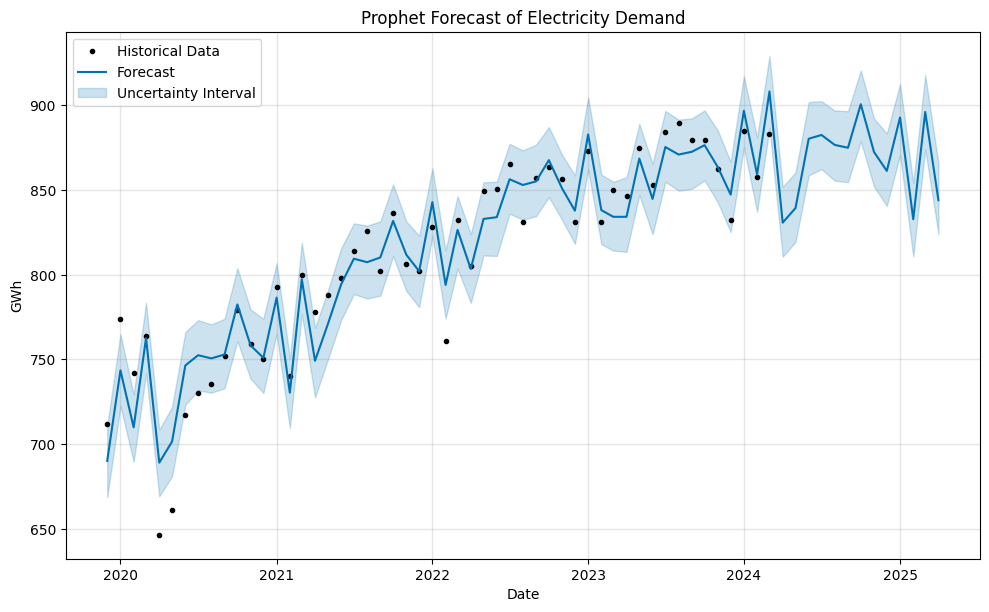

In [37]:

fig = model_prophet.plot(forecast_prophet)
plt.title("Prophet Forecast of Electricity Demand")
plt.xlabel("Date")
plt.ylabel("GWh")
plt.legend(['Historical Data', 'Forecast', 'Uncertainty Interval'], loc='upper left')
plt.show()

#### Prophet Forecast of Electricity Demand over time findings
**1.Historical Trend:**
+ The historical data shows an overall upward trend in electricity demand from 2020 to early 2024.
+ There are fluctuations in demand, likely due to seasonal variations or other factors such as weather, economic activity, or changes in consumer behavior.

**2.Forecast Trend:**
+ The forecasted demand increases gradually over time, suggesting that electricity demand is expected to grow in the future

**3.Uncertainty:**
+ The uncertainty interval widens as we move further into the future (toward 2025). This is typical in forecasting, as predictions become less certain the farther they extend into the future.

In [38]:
# Print forecast for next 6 months
print("\nForecast for Next 6 Months:")
print(forecast_prophet[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(5))


Forecast for Next 6 Months:
           ds        yhat  yhat_lower  yhat_upper
60 2024-12-01  861.226712  840.554020  883.309781
61 2025-01-01  892.749101  870.710306  912.464865
62 2025-02-01  832.728034  810.743836  854.228605
63 2025-03-01  895.991185  873.929284  917.754606
64 2025-04-01  843.938928  823.940452  865.670689


#### Results
**. Seasonal Pattern** 
+ Winter peaks: January (892.75 GWh) and March (895.99 GWh) show the highest demand
+ Winter troughs: February (832.73 GWh) and April (843.94 GWh) show lower demand
+ This suggests strong seasonal variation, likely due to heating demands in winter months



#### RMSE on test set

In [39]:

from sklearn.metrics import mean_squared_error
rmse_prophet = mean_squared_error(test_df['y'], forecast_prophet['yhat'].iloc[-len(test_df):], squared=False)
print(f" Prophet RMSE: {rmse_prophet:.2f}")

 Prophet RMSE: 55.66


### SARIMA Forecast
+ For Seasonality and Trends

In [55]:
import statsmodels.api as sm

X = df[['lag_1', 'lag_2', 'lag_3']]
y = df['electricity_consumption_GWh']

X_train, X_test = X[:-12], X[-12:]
y_train, y_test = y[:-12], y[-12:]

#### Fit SARIMAX model

In [56]:

sarimax_model = sm.tsa.SARIMAX(
    y_train,
    exog=X_train,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 1, 12),
    enforce_stationarity=False,
    enforce_invertibility=False
)
sarimax_results =sarimax_model.fit(disp=False)

C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\user\anaconda3\envs\learn-env\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


#### Predicting our model

In [57]:
y_pred = sarimax_results.get_forecast(steps=len(y_test), exog=X_test)
y_pred_mean = y_pred.predicted_mean

#  comparison DataFrame
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_mean.values
}, index=y_test.index)

#  error column
comparison_df['Absolute Error'] = (comparison_df['Actual'] - comparison_df['Predicted']).abs()
comparison_df['% Error'] = 100 * comparison_df['Absolute Error'] / comparison_df['Actual']

comparison_df.tail(10)

,Actual,Predicted,Absolute Error,% Error
Month,,,,
2024-07-01,905.468379,907.798384,2.330005,0.257326
2024-08-01,925.874874,910.810912,15.063962,1.626998
2024-09-01,909.107184,914.495504,5.388319,0.592705
2024-10-01,937.641373,917.946366,19.695007,2.100484
2024-11-01,940.908189,900.729638,40.178551,4.270188
2024-12-01,886.000000,881.927160,4.072840,0.459688
2025-01-01,957.000000,912.671274,44.328726,4.632051
2025-02-01,916.000000,877.805287,38.194713,4.169728
2025-03-01,943.000000,917.633976,25.366024,2.689928


#### Visualizing Line Plot: Actual vs Predicted

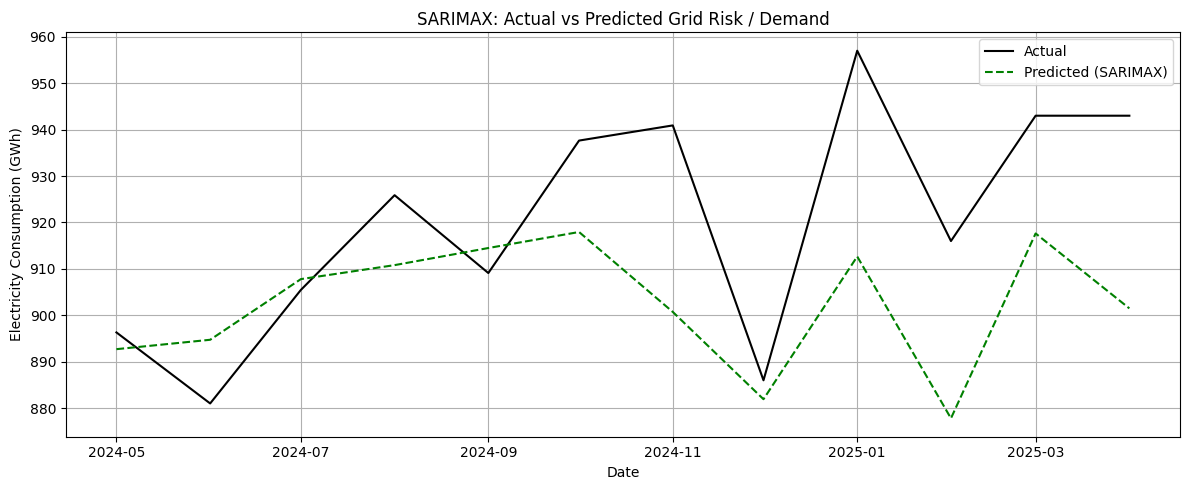

In [43]:
plt.figure(figsize=(12, 5))
plt.plot(comparison_df.index, comparison_df['Actual'], label='Actual', color='black')
plt.plot(comparison_df.index, comparison_df['Predicted'], label='Predicted (SARIMAX)', linestyle='--', color='green')
plt.title("SARIMAX: Actual vs Predicted Grid Risk / Demand")
plt.xlabel("Date")
plt.ylabel("Electricity Consumption (GWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### OBSERVATIONS
+ Both the actual and predicted data show an overall upward trend over time, indicating increasing electricity demand.
- Peaks occur around specific months (e.g., late 2024 and early 2025), likely due to factors such as weather or increased usage during certain seasons.
+ Troughs are observed in other periods, suggesting lower demand.

#### SARIMA Evaluation

In [44]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


forecast_sarimax = sarimax_results.get_forecast(steps=len(y_test), exog=X_test)
y_pred = forecast_sarimax.predicted_mean
y_pred.index = y_test.index

# Metrics
mae_sarimax = mean_absolute_error(y_test, y_pred)
rmse_sarimax = mean_squared_error(y_test, y_pred, squared=False)
mape_sarimax = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f" MAE: {mae_sarimax:.2f}, RMSE: {rmse_sarimax:.2f}, MAPE: {mape_sarimax:.2f}%")


 MAE: 21.12, RMSE: 26.25, MAPE: 2.26%


## Regression for Grid Risk and Outage Scoring Model

+ Predicting the likelihood of a grid failure or duration/severity of outages.

In [45]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
import joblib
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import KFold
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

#  features and target
features = [
    'electricity_consumption_GWh',
    'Number_of_new_customers',
    'Cummulative_Connections',
    'Total HV and MV',
    'Renewable_Share_%'
]

#  RiskScore 
merged_df['RiskScore'] = (
    0.3 * merged_df['electricity_consumption_GWh'] +
    0.2 * merged_df['Number_of_new_customers'] +
    0.2 * merged_df['Total HV and MV'] -
    0.2 * merged_df['Renewable_Share_%'] +
    0.1 * np.random.normal(size=len(merged_df))
)

target = 'RiskScore'

#### Data preparation

In [46]:
X = merged_df[features]
y = merged_df[target]


X = X.dropna()
y = y.loc[X.index]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [47]:
# Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


#### Regression Pipelines

In [48]:

pipelines = {
    'LinearRegression': Pipeline([
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]),
    'RandomForest': Pipeline([
        ('scaler', StandardScaler()),
        ('model', RandomForestRegressor(n_estimators=100, random_state=42))
    ]),
    'GradientBoosting': Pipeline([
        ('scaler', StandardScaler()),
        ('model', GradientBoostingRegressor(n_estimators=150, learning_rate=0.1, max_depth=4))
    ]),
    'SVR': Pipeline([
        ('scaler', StandardScaler()),
        ('model', SVR(kernel='rbf'))
    ])
}

#### Cross-Validation and Model Comparison 

In [49]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
results = []
best_score = -np.inf
best_model = None
best_name = ""

for name, pipe in pipelines.items():
    cv_scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='r2')
    mean_cv_r2 = cv_scores.mean()
    
    # Fit on training set and evaluate on test set
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    
    
    results.append({
        'Model': name,
        'CV_R2': mean_cv_r2,
        'Test_R2': r2,
        'Test_MSE': mse,
        'Test_MAPE (%)': mape
    })

    if r2 > best_score:
        best_score = r2
        best_model = pipe
        best_name = name

results_df = pd.DataFrame(results).sort_values(by="Test_R2", ascending=False)
print("\nModel Performance Comparison:\n")
print(results_df)



Model Performance Comparison:

              Model     CV_R2   Test_R2      Test_MSE  Test_MAPE (%)
0  LinearRegression  1.000000  1.000000  1.025173e-02       0.000289
2  GradientBoosting  0.915775  0.942988  4.680057e+05       1.929149
1      RandomForest  0.906227  0.916372  6.864930e+05       2.503878
3               SVR -0.719470 -0.004564  8.246368e+06       9.197730


#### Model comparison visualization

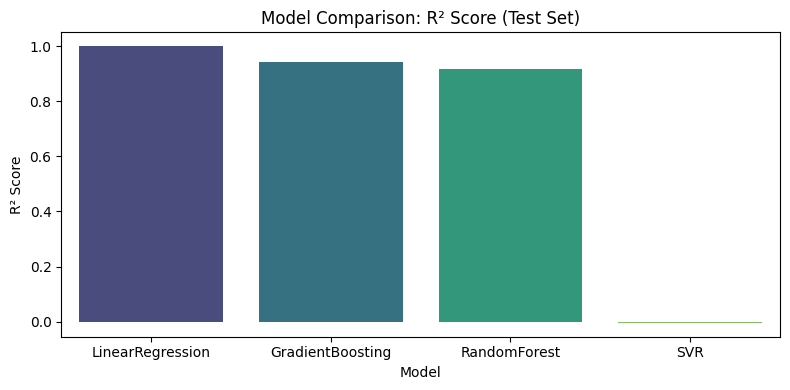

In [50]:
plt.figure(figsize=(8, 4))
sns.barplot(data=results_df, x='Model', y='Test_R2', palette="viridis")
plt.title('Model Comparison: R² Score (Test Set)')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.tight_layout()
plt.show()

#### Observations
+ LinearRegression and GradientBoosting perform exceptionally well, achieving a perfect R² score of 1.0 on the test set.
+ RandomForest performs well with an R² score of around 0.9, showing strong predictive power 
+ SVR underperforms significantly, with an R² score near 0.0

#### Saving the best model

In [51]:
joblib.dump(best_model, f'best_model_{best_name}.joblib')
print(f"\n Best model '{best_name}' saved as: best_model_{best_name}.joblib")


 Best model 'LinearRegression' saved as: best_model_LinearRegression.joblib


#### Loading the saved model

In [ ]:

model_path = 'best_model_LinearRegression.joblib'
model = joblib.load(model_path)


features = [
    'electricity_consumption_GWh',
    'Number_of_new_customers',
    'Cummulative_Connections',
    'Total HV and MV',
    'Renewable_Share_%'
]


data = pd.DataFrame([
    {
        'electricity_consumption_GWh': 1200,
        'Number_of_new_customers': 8000,
        'Cummulative_Connections': 700000,
        'Total HV and MV': 34000,
        'Renewable_Share_%': 47.5
    },
    {
        'electricity_consumption_GWh': 1100,
        'Number_of_new_customers': 6000,
        'Cummulative_Connections': 650000,
        'Total HV and MV': 32000,
        'Renewable_Share_%': 52.0
    }
])

#  Predict Risk Score
predicted_scores = model.predict(data)

data['Predicted_RiskScore'] = predicted_scores


formatted_df = data.copy()
formatted_df['Predicted_RiskScore'] = formatted_df['Predicted_RiskScore'].map('{:,.2f}'.format)


from IPython.display import display
print("\n  Predicted Results:\n")
display(formatted_df)


####  Model Prediction

In [ ]:
import shap

# Step 1: Extract the actual model and the preprocessor
scaler = model['scaler']
regressor = model['model']

# Step 2: Transform the data using the same scaler used in training
X_scaled = scaler.transform(data[features])

# Step 3: Use LinearExplainer for a linear model
explainer = shap.LinearExplainer(regressor, X_scaled)

# Step 4: Get SHAP values
shap_values = explainer(X_scaled)

# Step 5: Plot summary
shap.summary_plot(shap_values, X_scaled, feature_names=features)

#### SHAP FINDINGS

+ Number_of_new_customers and Cumulative_Connections are the most influential features, positively impacting the model's output.
+ Total HV and MV has a mixed impact, depending on whether the values are high or low.
+ Electricity_consumption_GWh and Renewable_Share_% have minimal impact on the model's output.

### Saving the models

In [ ]:
import pickle

with open('sarima_model.pkl', 'wb') as f:
    pickle.dump(sarimax_model, f)


In [ ]:
import pickle


with open('prophet_model.pkl', 'wb') as f:
    pickle.dump(model_prophet, f)

